# LineaPy Example Use Case: Predicting House Prices

This use case illustrates how LineaPy can facilitate an end-to-end data science workflow for housing price prediction. This notebook comes in 3 main sections:

1. ***Exploratory Data Analysis and Feature Engineering.*** Using various statistics and visualizations, we explore the given data
to create useful features. We use LineaPy to store the transformed data as an artifact, which allows us to automatically refactor and clean up the code.

2. ***Training a Model.*** Using the transformed data, we train a model that can predict housing prices. We then store
the trained model as an artifact.

3. ***Building an End-to-End Pipeline.*** Using artifacts saved in this session, we quickly build an end-to-end
pipeline that combines data preprocessing and model training, moving closer to production.


<div class="alert alert-info">

If you encounter issues you cannot resolve, simply ask in our [Slack community](https://join.slack.com/t/lineacommunity/shared_invite/zt-18kizfn3b-1Qu_HDT3ahGudnAwoFAw9Q)'s `#support` channel. We are always happy and ready to help you!

</div>

## Exploratory Data Analysis and Feature Engineering

In this section, we are doing data analysis and feature engineering on tabular data containing features for house sales price prediction. A detailed description of the dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

We will start with exploratory data analysis (EDA) on the dataset. As we establish understanding of the dataset by inspecting the raw content, computing statistics, and creating visualizations, we will be incrementally cleaning the dataset to move towards a dataset that can be used for model training.

We will be using `lineapy` to help us extract the preprocessing pipeline from our work session without us having to retrace our steps to figure out what parts of the notebook were EDA and what parts were transforming the data and thus should be included in the pipeline. We do this by simply adding `import lineapy` in the first cell and then invoking `lineapy.save` on the final training dataframe to create a Linea Artifact.

<div class="alert alert-info">

You can ignore `# NBVAL_*` and safely remove it from the notebook as you go through the example. It is for passing unit tests only, which we do to make sure the examples are always functional as we update the codebase.

</div>

In [1]:
# Set option so plots in EDA are visible
%matplotlib inline

import lineapy
lineapy.tag("Housing Price Demo")

In [2]:
# NBVAL_IGNORE_OUTPUT
import pandas as pd

data_url = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/use_cases/predict_house_price/data/ames_train_cleaned.csv"
training_data = pd.read_csv(data_url)

In [3]:
training_data.head(10)

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,TotalBathrooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,204900,2.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,95300,1.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,181900,1.5
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,254100,3.5
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,199700,2.5
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,6,2010,WD,Normal,205300,2.5
6,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,NaN,NaN,NaN,0,1,2010,WD,Normal,201400,2.0
7,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,Normal,246500,3.0
8,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,NaN,GdPrv,Shed,500,3,2010,WD,Normal,174900,3.0
9,13,527166040,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,170300,2.5


In [4]:
training_data.shape

(1998, 83)

In [5]:
training_data.columns

Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
      

### Remove columns with > 80% values missing

In [6]:
columns_to_drop = training_data.columns[training_data.isnull().sum() / training_data.shape[0] > .8]
columns_to_drop

Index(['Alley', 'Pool_QC', 'Fence', 'Misc_Feature'], dtype='object')

These columns are mostly missing data, so let's remove them from the dataset.

In [7]:
training_data = training_data.drop(columns_to_drop, axis=1)
training_data.shape

(1998, 79)

### Feature Group 1: Ratios of Square Footage Features

We start by plotting the relationship between different square footage features

In [8]:
# NBVAL_IGNORE_OUTPUT
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

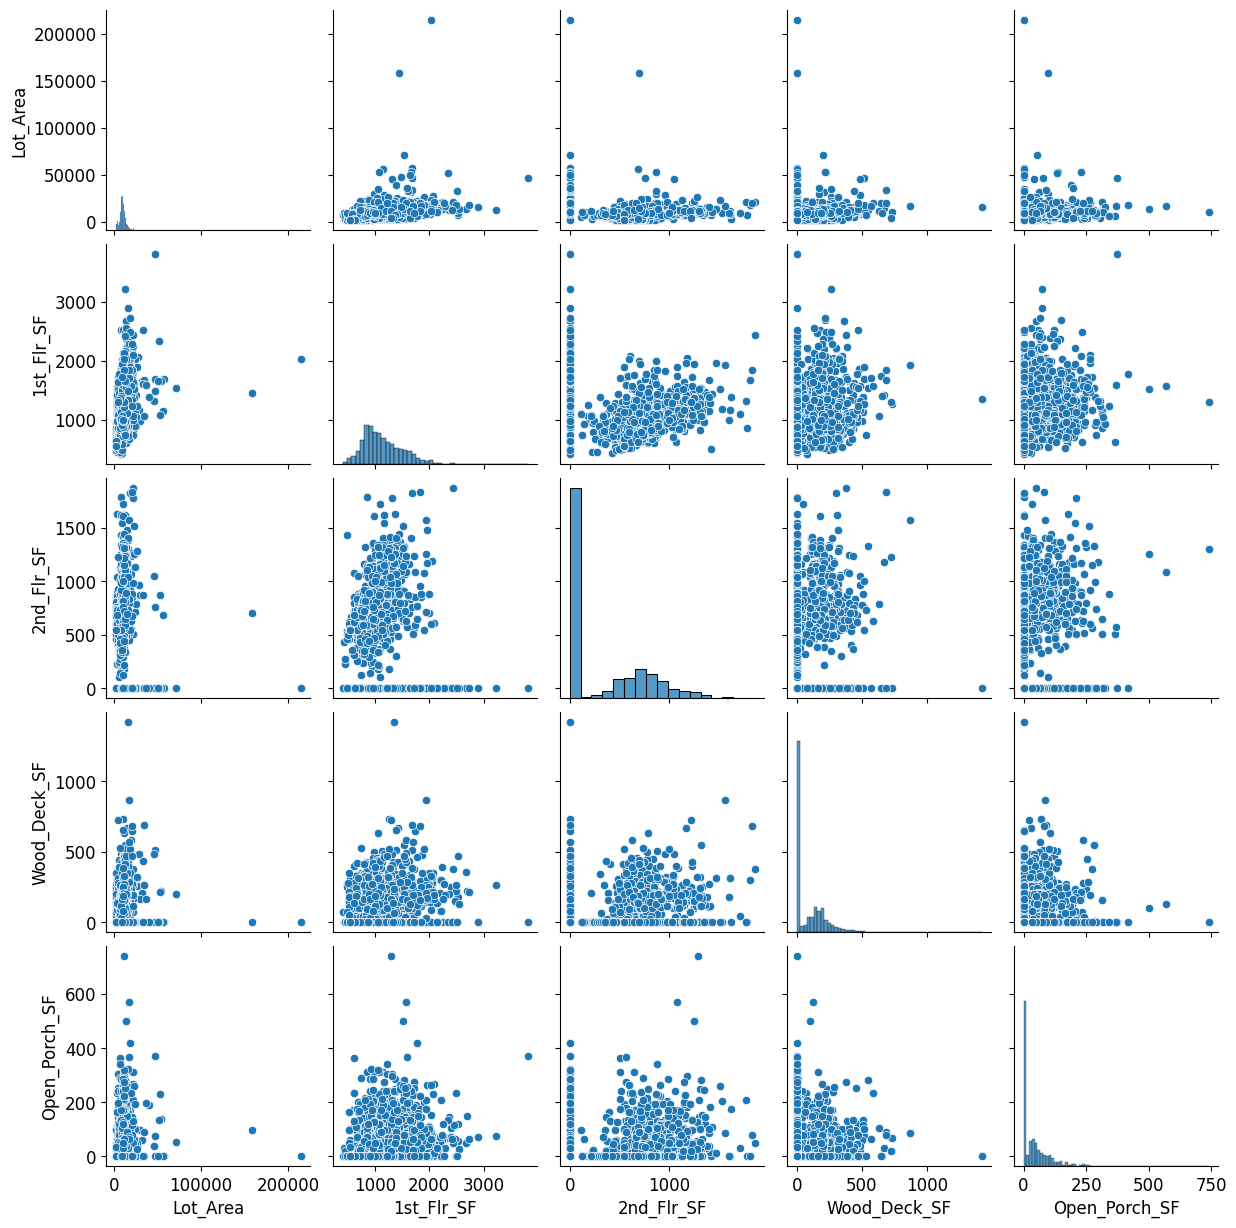

In [9]:
# NBVAL_IGNORE_OUTPUT
sf_features = ['Lot_Area', '1st_Flr_SF', '2nd_Flr_SF', 'Wood_Deck_SF', 'Open_Porch_SF']
sns.pairplot(training_data[sf_features])

From the chart above, we have identified the following relationships as features to be inserted into the training data,

- Lot_Area : 1st_Flr_SF
- 1st_Flr_SF : 2nd_Flr_SF
- Wood_Deck_SF : 2nd_Flr_SF

In addition, we will remove `1st_Flr_SF` and `2nd_Flr_SF` to avoid issues associated with correlated features.

In [10]:
import numpy as np
training_data['LA_v_1st'] = training_data['Lot_Area'] / training_data['1st_Flr_SF']
training_data['1st_v_2nd'] = np.where(training_data['2nd_Flr_SF'] > 0, training_data['1st_Flr_SF'] / training_data['2nd_Flr_SF'], 0)
training_data['wd_v_2nd'] = np.where(training_data['2nd_Flr_SF'] > 0, training_data['Wood_Deck_SF'] / training_data['2nd_Flr_SF'], 0)
training_data = training_data.drop(['1st_Flr_SF', '2nd_Flr_SF'], axis=1)

## `basement_value` feature

The `basement_value` feature involves combining all the individual basement features to create a categorical feature with the values 1 for high-value and 0 for low-value.

First, let's find all the features related to basements.

In [11]:
basement_features = [x for x in training_data.columns if 'bsmt' in x.lower()]
basement_features

['Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_SF_1',
 'BsmtFin_Type_2',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath']

In [12]:
training_data[basement_features]

,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath
0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,1.0,0.0
1,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0
2,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0
3,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,1.0,0.0
4,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1993,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,1.0,0.0
1994,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,1.0,0.0
1995,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,1.0,0.0
1996,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,0.0,1.0


We see that some of the features are numeric while others are categorical, which should be handled differently.

In [13]:
basement_numeric = ['BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF']
basement_categorical = ['Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2']

Let's first take a look at the relationship between the numeric features

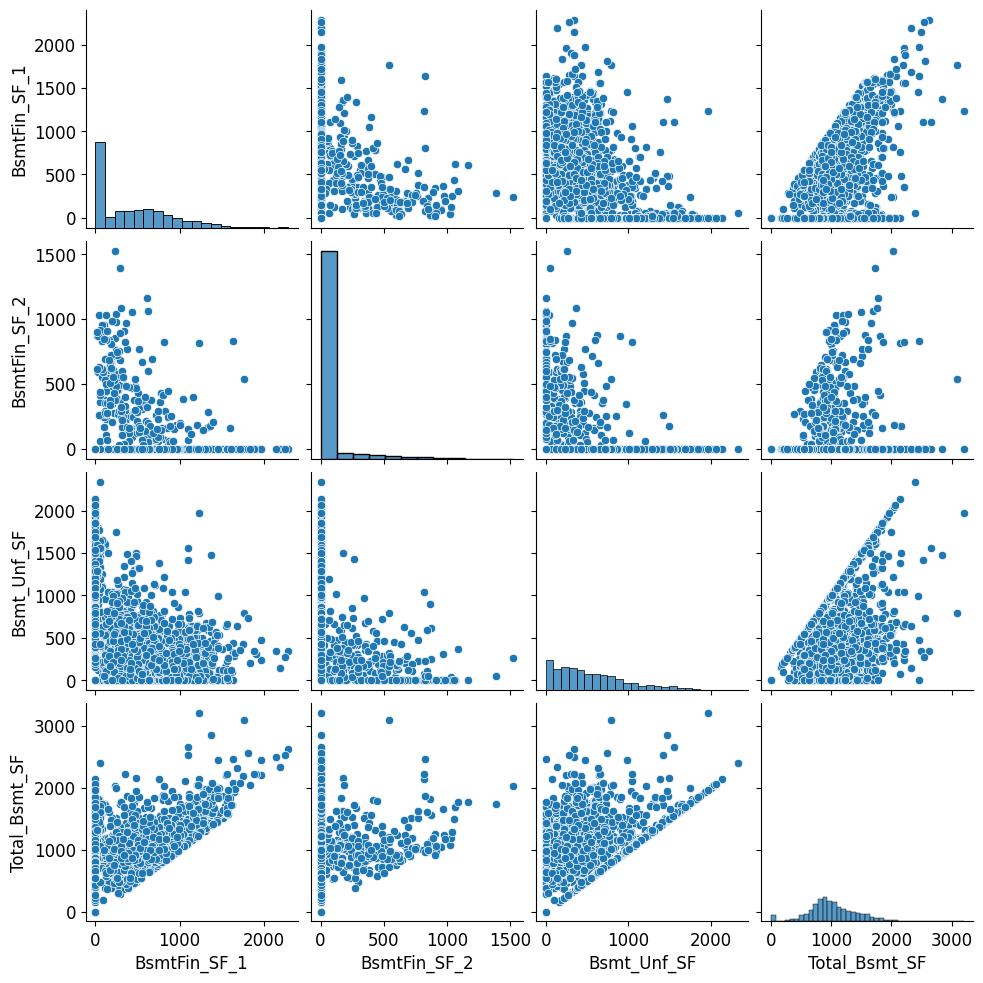

In [14]:
# NBVAL_IGNORE_OUTPUT
sns.pairplot(training_data[basement_numeric])

Let's now look at the distribution of the categorical features

Text(0.5, 0, 'BsmtFin_Type_2')

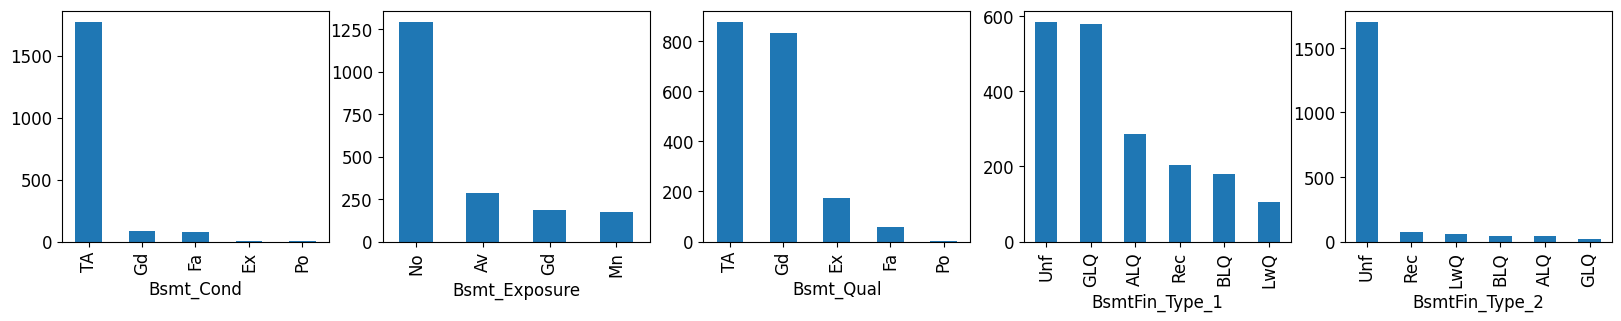

In [15]:
# NBVAL_IGNORE_OUTPUT

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
training_data['Bsmt_Cond'].value_counts().plot.bar(ax=axes[0])
axes[0].set_xlabel('Bsmt_Cond')
training_data['Bsmt_Exposure'].value_counts().plot.bar(ax=axes[1])
axes[1].set_xlabel('Bsmt_Exposure')
training_data['Bsmt_Qual'].value_counts().plot.bar(ax=axes[2])
axes[2].set_xlabel('Bsmt_Qual')
training_data['BsmtFin_Type_1'].value_counts().plot.bar(ax=axes[3])
axes[3].set_xlabel('BsmtFin_Type_1')
training_data['BsmtFin_Type_2'].value_counts().plot.bar(ax=axes[4])
axes[4].set_xlabel('BsmtFin_Type_2')

<AxesSubplot:xlabel='BsmtFin_SF_1', ylabel='BsmtFin_SF_2'>

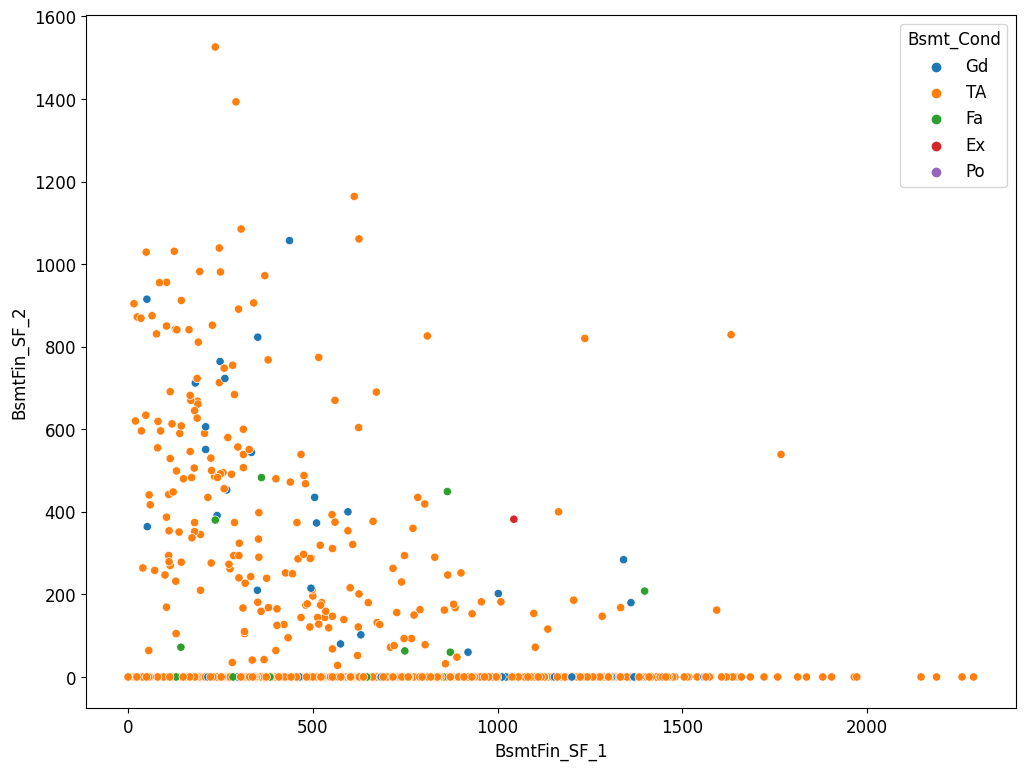

In [16]:
# NBVAL_IGNORE_OUTPUT

sns.scatterplot(data=training_data, x='BsmtFin_SF_1', y='BsmtFin_SF_2', hue='Bsmt_Cond')

Based on the visualizations above, we create the following function for computing the `basement_value` feature

In [17]:
def basement_value(pt):
    baths = pt['Bsmt_Full_Bath'] + 0.5 * pt['Bsmt_Half_Bath'] 
    large = pt['Total_Bsmt_SF'] > 300
    if pt['BsmtFin_Type_1'] in {'GLQ', 'ALQ'} and pt['Bsmt_Cond'] in {'Ex', 'Gd'} \
        and pt['Bsmt_Qual'] in {'Ex', 'Gd'} and baths > 0.5 and large:
        return 1
    return 0

In [18]:
training_data['basement_value'] = training_data.apply(basement_value, axis=1)
training_data = training_data.drop(basement_features, axis=1)

Finally, we want to make sure that we only include the features we have created in this process and remove the others that we did not preprocess.

In [19]:
training_data= training_data.filter(
    regex="Gr_Liv_Area|Garage_Area|SalePrice|LA_v_1st|1st_v_2nd|wd_v_2nd|basement_value"
).fillna(value=0)

### Saving data and code together

Oftentimes, we want to revisit how a training dataset was prepared. This requires tracking the code for generating the data alongside the data. We can do this automatically by registering the file as a `LineaArtifact` via `lineapy.save`. 

We can call `lineapy.save` directly on the `training_data` variable, in which case LineaPy will handle serialization of the variable automatically. 

In [20]:
artifact = lineapy.save(training_data, "cleaned_data_housing")

The code for creating the artifact can be retrieved via the `get_code()` method on the artifact. Note that the code contains only the necessary and sufficient operations. That is, the code for EDA that does not transform the data is excluded from the artifact code, and the artifact code is sufficient to reproduce the results. From the entire notebook session, LineaPy is able to automatically extract the following code for producing the artifact:

In [21]:
print(artifact.get_code())

import numpy as np
import pandas as pd

data_url = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/use_cases/predict_house_price/data/ames_train_cleaned.csv"
training_data = pd.read_csv(data_url)
columns_to_drop = training_data.columns[
    training_data.isnull().sum() / training_data.shape[0] > 0.8
]
training_data = training_data.drop(columns_to_drop, axis=1)
training_data["LA_v_1st"] = training_data["Lot_Area"] / training_data["1st_Flr_SF"]
training_data["1st_v_2nd"] = np.where(
    training_data["2nd_Flr_SF"] > 0,
    training_data["1st_Flr_SF"] / training_data["2nd_Flr_SF"],
    0,
)
training_data["wd_v_2nd"] = np.where(
    training_data["2nd_Flr_SF"] > 0,
    training_data["Wood_Deck_SF"] / training_data["2nd_Flr_SF"],
    0,
)
training_data = training_data.drop(["1st_Flr_SF", "2nd_Flr_SF"], axis=1)
basement_features = [x for x in training_data.columns if "bsmt" in x.lower()]


def basement_value(pt):
    baths = pt["Bsmt_Full_Bath"] + 0.5 * pt["Bsmt_Half_Bath"

## Training a model

Now, we will use the training data we got to train a simple Linear Regression Model for predicting house price. We will use LineaPy to save the model and the code for creating the model into a Linea Artifact.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
train, val = train_test_split(training_data, test_size=0.3, random_state=42)
X_train = train.drop(['SalePrice'], axis = 1)
y_train = train.loc[:, 'SalePrice']
X_val = val.drop(['SalePrice'], axis = 1)
y_val = val.loc[:, 'SalePrice']

In [24]:
# NBVAL_IGNORE_OUTPUT
X_train

,Gr_Liv_Area,Garage_Area,LA_v_1st,1st_v_2nd,wd_v_2nd,basement_value
557,2787,820,10.149829,0.721433,0.192712,0
843,1436,1488,8.641148,6.890110,0.000000,0
1651,2263,420,10.377682,1.061020,0.131148,0
1345,1559,812,5.195638,0.000000,0.000000,0
1160,1554,627,2.953668,0.000000,0.000000,0
...,...,...,...,...,...,...
1130,914,270,18.817287,0.000000,0.000000,0
1294,922,308,10.596529,0.000000,0.000000,0
860,2082,484,8.389134,1.891667,0.388889,0
1459,1330,437,6.266165,0.000000,0.000000,0


In [25]:
# NBVAL_IGNORE_OUTPUT
y_train

557     260700
843     147000
1651    263800
1345    146500
1160    202300
         ...  
1130    134900
1294    109100
860     207500
1459    161140
1126    161900
Name: SalePrice, Length: 1398, dtype: int64

In [26]:
linear_model = LinearRegression(fit_intercept=True)

In [27]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [28]:
X_val["Predicted Sales Price"] = y_predicted

In [29]:
# NBVAL_IGNORE_OUTPUT
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_predicted, squared=False)
rmse

48493.02101538239

The results look good on the validation set. 

## Running evaluation on new data

Now we want to run our model on the testing data, which is provided in a separate file. This means we need to transform the test csv into a test dataset going through the same set of feature transformations we applied to the training csv. 

Fortunately, lineapy makes this very easy as we can create a function that encapsulates all the data transformation using `get_function`. 

Here we specify that the output we want is of the `cleaned_data_housing` format, and that we would like to parametrize the `data_url`.

This gives a ready to use function which we name `process_housing_data`. 

In [30]:
test_url = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/use_cases/predict_house_price/data/ames_test_cleaned.csv"

In [31]:
process_housing_data = lineapy.get_function(['cleaned_data_housing'], input_parameters=['data_url'])

With this function, transforming the test csv is very simple, we simply call the function with the `test_url` to get our `test_data`.

Note: Lineapy created functions return a dictionary mapping the output name to its value. Since the specified output was an artifact named `cleaned_data_housing`, to get the test data value we need to index the function's output by this name. 

In [32]:
test_data = process_housing_data(test_url)['cleaned_data_housing']

In [33]:
X_test = test_data.drop(['SalePrice'], axis = 1)
y_test = test_data.loc[:, 'SalePrice']

In [34]:
# NBVAL_IGNORE_OUTPUT
y_predicted = linear_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted, squared=False)
rmse

46789.6506722432

The results look good on the test set too! Let's save the model using LineaPy

In [35]:
artifact = lineapy.save(linear_model, 'linear_model_housing')

## Building an End-to-End Pipeline

We can combine the preprocessing and modeling steps and use LineaPy to create a data pipeline from artifacts with the to_pipeline function. We currently support Python scripts and Airflow as the two frameworks for running pipelines. Learn more about pipelines in the official docs [here](https://docs.lineapy.org/en/latest/tutorials/00_api_basics.html#Using-artifacts-to-build-pipelines) and the detailed tutorial [here](https://github.com/LineaLabs/lineapy/blob/main/examples/tutorials/02a_build_pipelines.ipynb).


Let's now create a pipeline containing the data preprocessing artifact `cleaned_data_housing` and the model training artifact `linear_model_housing`

In [36]:
# NBVAL_SKIP
import os
directory = lineapy.to_pipeline(
    ["cleaned_data_housing", "linear_model_housing"], 
    framework="AIRFLOW",
    pipeline_name="data_housing_pipeline",
    dependencies={ "linear_model_housing": { "cleaned_data_housing" } },
    output_dir="./airflow/dags/"
)

Generated module file: airflow/dags/data_housing_pipeline_module.py                                                                                        
Generated requirements file: airflow/dags/data_housing_pipeline_requirements.txt                                                                           
Generated DAG file: airflow/dags/data_housing_pipeline_dag.py                                                                                              
Generated Docker file: airflow/dags/data_housing_pipeline_Dockerfile                                                                                       


We see the pipeline building resulting in the following 4 files:

In [37]:
# NBVAL_SKIP
os.listdir(directory)

['data_housing_pipeline_requirements.txt',
 'data_housing_pipeline_module.py',
 'data_housing_pipeline_Dockerfile',
 'data_housing_pipeline_dag.py']

Looking at `data_housing_pipeline_module.py` we see that it contains the modularized code to generate our two artifacts: "training_data" and "linear_model" 

In [38]:
# NBVAL_SKIP
os.system(f"cat {directory}/data_housing_pipeline_module.py");

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def get_cleaned_data_housing():
    data_url = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/use_cases/predict_house_price/data/ames_train_cleaned.csv"
    training_data = pd.read_csv(data_url)
    columns_to_drop = training_data.columns[
        training_data.isnull().sum() / training_data.shape[0] > 0.8
    ]
    training_data = training_data.drop(columns_to_drop, axis=1)
    training_data["LA_v_1st"] = training_data["Lot_Area"] / training_data["1st_Flr_SF"]
    training_data["1st_v_2nd"] = np.where(
        training_data["2nd_Flr_SF"] > 0,
        training_data["1st_Flr_SF"] / training_data["2nd_Flr_SF"],
        0,
    )
    training_data["wd_v_2nd"] = np.where(
        training_data["2nd_Flr_SF"] > 0,
        training_data["Wood_Deck_SF"] / training_data["2nd_Flr_SF"],
        0,
    )
    training_data = training_data

Looking at `data_housing_pipeline_dag.py` we see that it contains the Airflow DAG definition. Each of the modules defined in the modules file is composed as an operator in the DAG.

In [39]:
# NBVAL_SKIP
os.system(f"cat {directory}/data_housing_pipeline_dag.py");

import pathlib
import pickle

import data_housing_pipeline_module
from airflow.operators.python_operator import PythonOperator
from airflow.utils.dates import days_ago

from airflow import DAG


def task_setup():

    pickle_folder = pathlib.Path("/tmp").joinpath("data_housing_pipeline")
    if not pickle_folder.exists():
        pickle_folder.mkdir()


def task_cleaned_data_housing():

    training_data = data_housing_pipeline_module.get_cleaned_data_housing()

    pickle.dump(
        training_data,
        open("/tmp/data_housing_pipeline/variable_training_data.pickle", "wb"),
    )


def task_linear_model_housing():

    training_data = pickle.load(
        open("/tmp/data_housing_pipeline/variable_training_data.pickle", "rb")
    )

    linear_model = data_housing_pipeline_module.get_linear_model_housing(training_data)

    pickle.dump(
        linear_model,
        open("/tmp/data_housing_pipeline/variable_linear_model.pickle", "wb"),
    )


def task_teardown():

    pickle_file

These files, once placed in the location that Airflow expects (usually `dags/` under Airflow’s home directory), should let us immediately execute the pipeline from the UI or CLI.